# Introduciton and Scope: AI Agent as Data Scientist Assistant
I tackled this assignment as a POC to see what stages of data science project could an AI assistant help with to save time.  This POC focuses on the system's ability explore data and perform analysis.  

My next step is to extent the POC to include data collection and exploration, data cleaning and preparation, and evauation as it seems likely that if properly grounded in domain specific knowledge the system maybe able to identify patterns that explain the results.

### Functions Demonstated
 -  Prompt Engineering
 -  Zero Shot Prompting
 -  Function Calling
 -  Compositional Function Calling
<br>
### Future Phases
 - #### Grounding
     - RAG - Document grounding to provide definition to esoteric terms and database meta data
     - Google Search
 - Loooping Chat Bot - facilitate Chain of Thought prompting
 - Data Acquistion via google search

# Setup and Prerequisites (provided in labs)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [2]:
# Uninstall packages from Kaggle base image that are not needed.
!pip uninstall -qy jupyterlab jupyterlab-lsp
# Install the google-genai SDK for this codelab.
!pip install -qU 'google-genai==1.7.0'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.7/144.7 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.9/100.9 kB 5.3 MB/s eta 0:00:00


In [3]:
from google import genai
from google.genai import types

from IPython.display import Markdown, HTML, display

# genai.__version__

### Set API Keys

In [4]:
from kaggle_secrets import UserSecretsClient

GOOGLE_API_KEY = UserSecretsClient().get_secret("GOOGLE_API_KEY")

client = genai.Client(api_key=GOOGLE_API_KEY)

# Data for Analysis
Building the Slolom Data Set without AI Agent Agent Assitance
Next version add (1) Google Search as a tool to acquire data (2) LLM to gen Python to import data into db Table or panda dataframe.

Data from [FIS](https://www.fis-ski.com/DB/general/results.html?sectorcode=AL&competitorid=174158&raceid=123171#down:~:text=Results%2C%20Analysis%2C%20Standings-,Download,-(1.33%20MB))

In [5]:
# Data for Women's Slalom Top 20 - Sun Valley 2025
Wdata = [
    ["Mikaela Shiffrin", "USA", 52.00, 53.92, 105.92],
    ["Lena Dürr", "GER", 52.50, 54.55, 107.05],
    ["Andreja Slokar", "SLO", 52.80, 54.50, 107.30],
    ["Katharina Liensberger", "AUT", 53.00, 54.60, 107.60],
    ["Camille Rast", "SUI", 53.20, 54.70, 107.90],
    ["Wendy Holdener", "SUI", 53.40, 54.80, 108.20],
    ["Anna Swenn-Larsson", "SWE", 53.60, 54.90, 108.50],
    ["Michelle Gisin", "SUI", 53.80, 55.00, 108.80],
    ["Sara Hector", "SWE", 54.00, 55.10, 109.10],
    ["Zrinka Ljutić", "CRO", 54.20, 55.20, 109.40],
    ["Katharina Truppe", "AUT", 54.40, 55.30, 109.70],
    ["Katharina Huber", "AUT", 54.60, 55.40, 110.00],
    ["Mina Fürst Holtmann", "NOR", 54.80, 55.50, 110.30],
    ["Cornelia Öhlund", "SWE", 55.00, 55.60, 110.60],
    ["Emma Aicher", "GER", 55.20, 55.70, 110.90],
    ["Laurence St-Germain", "CAN", 55.40, 55.80, 111.20],
    ["Marie Lamure", "FRA", 55.60, 55.90, 111.50],
    ["Neja Dvornik", "SLO", 55.80, 56.00, 111.80],
    ["Hanna Aronsson Elfman", "SWE", 56.00, 56.10, 112.10],
    ["Ali Nullmeyer", "CAN", 56.20, 56.30, 112.50],
]

mens_results = [
    ["Timon Haugan", "NOR", "1:00.45", "1:00.12", "2:00.57"],
    ["Clément Noël", "FRA", "1:00.50", "1:00.10", "2:00.60"],
    ["Fabio Gstrein", "AUT", "1:00.70", "1:00.30", "2:01.00"],
    ["Henrik Kristoffersen", "NOR", "1:00.80", "1:00.40", "2:01.20"],
    ["Loïc Meillard", "SUI", "1:01.00", "1:00.50", "2:01.50"],
    ["Lucas Pinheiro Braathen", "BRA", "1:01.10", "1:00.60", "2:01.70"],
    ["Daniel Yule", "SUI", "1:01.20", "1:00.70", "2:01.90"],
    ["Manuel Feller", "AUT", "1:01.30", "1:00.80", "2:02.10"],
    ["Alex Vinatzer", "ITA", "1:01.40", "1:00.90", "2:02.30"],
    ["Sebastian Foss-Solevåg", "NOR", "1:01.50", "1:01.00", "2:02.50"],
    ["Ramon Zenhäusern", "SUI", "1:01.60", "1:01.10", "2:02.70"],
    ["Dave Ryding", "GBR", "1:01.70", "1:01.20", "2:02.90"],
    ["Albert Popov", "BUL", "1:01.80", "1:01.30", "2:03.10"],
    ["Giuliano Razzoli", "ITA", "1:01.90", "1:01.40", "2:03.30"],
    ["Erik Read", "CAN", "1:02.00", "1:01.50", "2:03.50"],
    ["Jett Seymour", "USA", "1:02.10", "1:01.60", "2:03.70"],
    ["Filip Zubčić", "CRO", "1:02.20", "1:01.70", "2:03.90"],
    ["Stefan Hadalin", "SLO", "1:02.30", "1:01.80", "2:04.10"],
    ["River Radamus", "USA", "1:02.40", "1:01.90", "2:04.30"],
]


## Database Build

In [6]:
%load_ext sql
%sql sqlite:///sample.db

In [7]:
%%sql
CREATE TABLE IF NOT EXISTS WomenSL (
    wsl_Id INTEGER PRIMARY KEY AUTOINCREMENT
    ,Skier_NME VARCHAR(100) NOT NULL
    ,Country_CD VARCHAR(3) NOT NULL
    ,Run1 DECIMAL(3,4) NOT NULL
    ,Run2 DECIMAL(3,4) NOT NULL
    ,TotalTime DECIMAL(3,4) NOT NULL
);

CREATE TABLE IF NOT EXISTS MenSL (
    msl_Id INTEGER PRIMARY KEY AUTOINCREMENT
    ,Skier_NME VARCHAR(100) NOT NULL
    ,Country_CD VARCHAR(3) NOT NULL
    ,Run1 DECIMAL(3,4) NOT NULL
    ,Run2 DECIMAL(3,4) NOT NULL
    ,TotalTime DECIMAL(3,4) NOT NULL
);

 * sqlite:///sample.db
Done.
Done.


[]

## Explicitly populate database
Future state (It would probably work in the current state) have the Agent generate and run the code to perfom the Insert operation.  
 

In [8]:
import sqlite3
conn = sqlite3.connect("sample.db")
cursor = conn.cursor()

cursor.executemany("""
    INSERT INTO WomenSL (Skier_Nme, Country_CD, Run1, Run2, TotalTime)
    VALUES (?, ?, ? ,? ,?)
""", Wdata)

cursor.executemany("""
    INSERT INTO MenSL (Skier_Nme, Country_CD, Run1, Run2, TotalTime)
    VALUES (?, ?, ? ,? ,?)
""", mens_results)


## Build db Tools for Agent to use 
### Add functions so engine can examine and perform database operations
[Modified from Day 3 - Function calling with the Gemini API](https://www.kaggle.com/code/markishere/day-3-function-calling-with-the-gemini-api) Copyright 2025 Google LLC.

In [9]:
def execute_query(sql: str) -> list[list[str]]:
    """Execute an SQL statement, returning the results."""
    print(f' - DB CALL: execute_query({sql})')

    cursor = conn.cursor()

    cursor.execute(sql)
    return cursor.fetchall()
    
## pull list of tables to identify where to permorm DML
def list_tables() -> list[str]:
    """Retrieve the names of all tables in the database."""
    # Include print logging statements so you can see when functions are being called.
    print(' - DB CALL: list_tables()')

    cursor = conn.cursor()

    # Fetch the table names.
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

    tables = cursor.fetchall()
    return [t[0] for t in tables]

## Describe Tables for DML Ops
def describe_table(table_name: str) -> list[tuple[str, str]]:
    """Look up the table schema.

    Returns:
      List of columns, where each entry is a tuple of (column, type).
    """
    print(f' - DB CALL: describe_table({table_name})')

    cursor = conn.cursor()

    cursor.execute(f"PRAGMA table_info({table_name});")

    schema = cursor.fetchall()
    # [column index, column name, column type, ...]
    return [(col[1], col[2]) for col in schema]


# list of db tools for AI 
db_tools = [list_tables, describe_table, execute_query]

# Create Inital Agent with instructions

In [10]:
instruction = """You are a helpful chatbot that aids the user in performing statistical analysis of ski race results which are stored and you can update in a 
SQL database  You will take the users questions, search for the relevant data online, store them in SQL Databases and translate questions into SQL
queries using the tools available. Once you have the information you need, you will
answer the user's question using the data returned.

Use list_tables to see what tables are present, describe_table to understand the
schema, and execute_query to issue an SQL SELECT query.

Use descriptive and inferential statistics selecting the most appropriate method based on user's question
assume race results are a population and not a sample

"""

client = genai.Client(api_key=GOOGLE_API_KEY)

# Start a chat with automatic function calling enabled.
chat = client.chats.create(
    model="gemini-2.0-flash",
    config=types.GenerateContentConfig(
        system_instruction=instruction,
        tools=db_tools,
    ),
)

### Retry Policy (if needed)

In [11]:
# Define a retry policy. The model might make multiple consecutive calls automatically
# for a complex query, this ensures the client retries if it hits quota limits.
from google.api_core import retry

is_retriable = lambda e: (isinstance(e, genai.errors.APIError) and e.code in {429, 503})

if not hasattr(genai.models.Models.generate_content, '__wrapped__'):
  genai.models.Models.generate_content = retry.Retry(
      predicate=is_retriable)(genai.models.Models.generate_content)

<div class="alert alert-block alert-warning">
<b>Test 1:</b> without specific instructions guiding agent to which table holds women's results <br>   
<b> Prompt::</b> resp = chat.send_message("who was the fastes woman skier?"
</div>

 



=

In [12]:
resp = chat.send_message("who was the fastes woman skier?")
print(f"\n{resp.text}")

 - DB CALL: execute_query(SELECT skier_name FROM race_results WHERE gender = 'female' ORDER BY time ASC LIMIT 1)

I am sorry, I cannot fulfill this request. I do not have access to a table called race_results. Would you like me to list the tables I have access to?



## Halucination
<div class="alert alert-block alert-info">
This is an interesting hallucination as neither that table nor those columns exist in the sample db
the agent is not using the availale list_tables() function/ tool or is unable to decode the table name WomenSL
</div>


## Change instructions for agent
<div class="alert alert-block alert-warning">
<b>Change Instruction:</b> explicityly specify where women's data is located
</div>


In [13]:
instruction = """You are a helpful chatbot that aids the user in performing statistical analysis of ski race results which are stored and you can update in a 
SQL database  You will take the users questions, search for the relevant data online, store them in SQL Databases and translate questions into SQL
queries using the tools available. Once you have the information you need, you will
answer the user's question using the data returned.

Use list_tables to see what tables are present 
use describe_table to understand the schema, and execute_query to issue an SQL SELECT query.

Women's results are stored in the SQL table WomenSL


Use descriptive and inferential statistics in the scipy library to analyze data
selecting the most appropriate method based on user's question and distriubtion of data
assume race results are a population and not a sample

"""

client = genai.Client(api_key=GOOGLE_API_KEY)

# Start a chat with automatic function calling enabled.
chat = client.chats.create(
    model="gemini-2.0-flash",
    config=types.GenerateContentConfig(
        system_instruction=instruction,
        tools=db_tools,
    ),
)

### Retest 
<div class="alert alert-block alert-warning">
<b>Test 1:</b> without specific instructions guiding agent to which table holds women's results 
</div>

In [14]:
resp = chat.send_message("who was the fastes woman skier?")
print(f"\n{resp.text}")

 - DB CALL: execute_query(SELECT skierName, time FROM WomenSL ORDER BY time ASC LIMIT 1)
 - DB CALL: describe_table(WomenSL)
 - DB CALL: execute_query(SELECT Skier_NME, TotalTime FROM WomenSL ORDER BY TotalTime ASC LIMIT 1)

The fastest woman skier was Mikaela Shiffrin, with a total time of 105.92.



In [15]:
resp = chat.send_message("which women's time varied the most between run1 and run 2?")
print(f"\n{resp.text}")

 - DB CALL: execute_query(SELECT Skier_NME, ABS(Run1 - Run2) AS TimeDifference FROM WomenSL ORDER BY TimeDifference DESC LIMIT 1)

Lena Dürr's time varied the most between Run 1 and Run 2, with a difference of 2.05 seconds.



### Test ability for generalization from Women's to Men's results
having provided instructions for the location of women's results can the model generalize location of men's data?
<div class="alert alert-block alert-warning">
<b>Test 2:</b> without specific instructions guiding agent to which table holds men's results <br>   
<b> Prompt:</b> resp = chat.send_message("who was the fastes woman skier?"
</div>

In [16]:
resp = chat.send_message("who was the fastest male Skier?")
print(f"\n{resp.text}")


I do not have the table with the men's results. I can only access the WomenSL table. Would you like me to analyze the data from the women's results instead?



### Tuning instructions adding men's results



## Failure without Halucination
<div class="alert alert-block alert-info">
<b>Result:</b> again the LLM could not decode menSL but this time did not halluciate a results table.<br>
Correction: adding location to men's results with less specificity<br>
Future Test: try including work 'Result' to table names to see if it aids LLM
</div>

In [17]:
instruction = """You are a helpful chatbot that aids the user in performing statistical analysis of ski race results which are stored and you can update in a 
SQL database  You will take the users questions, search for the relevant data online, store them in SQL Databases and translate questions into SQL
queries using the tools available. Once you have the information you need, you will
answer the user's question using the data returned.

Use list_tables to see what tables are present 
use describe_table to understand the schema, and execute_query to issue an SQL SELECT query.

Women's results are stored in the SQL table WomenSL
Mens's results are in the table MenSL


"""

client = genai.Client(api_key=GOOGLE_API_KEY)

# Start a chat with automatic function calling enabled.
chat = client.chats.create(
    model="gemini-2.0-flash",
    config=types.GenerateContentConfig(
        system_instruction=instruction,
        tools=db_tools,
    ),
)

### Retest Men's Results

In [18]:
resp = chat.send_message("who was the fastest male Skier?")
print(f"\n{resp.text}")

 - DB CALL: execute_query(SELECT Name, Time FROM MenSL ORDER BY Time ASC LIMIT 1)
 - DB CALL: describe_table(MenSL)
 - DB CALL: execute_query(SELECT Skier_NME, TotalTime FROM MenSL ORDER BY TotalTime ASC LIMIT 1)

The fastest male skier was Timon Haugan.



In [19]:
resp = chat.send_message("can you generate the python code and show the men's and women's results as a boxplot?")
print(f"\n{resp.text}")


I am sorry, I cannot generate boxplots with the available tools. I can only execute SQL queries and do not have the functionality to create visualizations or run Python code outside of the provided tools.



## Compositional function calling¶
A powerful new feature in Gemini 2.0 is the model's ability to compose user-provided function calls together while generating code

In [20]:
from pprint import pformat
from IPython.display import display, Image, Markdown


async def handle_response(stream, tool_impl=None):
  """Stream output and handle any tool calls during the session."""
  all_responses = []

  async for msg in stream.receive():
    all_responses.append(msg)

    if text := msg.text:
      # Output any text chunks that are streamed back.
      if len(all_responses) < 2 or not all_responses[-2].text:
        # Display a header if this is the first text chunk.
        display(Markdown('### Text'))

      print(text, end='')

    elif tool_call := msg.tool_call:
      # Handle tool-call requests.
      for fc in tool_call.function_calls:
        display(Markdown('### Tool call'))

        # Execute the tool and collect the result to return to the model.
        if callable(tool_impl):
          try:
            result = tool_impl(**fc.args)
          except Exception as e:
            result = str(e)
        else:
          result = 'ok'

        tool_response = types.LiveClientToolResponse(
            function_responses=[types.FunctionResponse(
                name=fc.name,
                id=fc.id,
                response={'result': result},
            )]
        )
        await stream.send(input=tool_response)

    elif msg.server_content and msg.server_content.model_turn:
      # Print any messages showing code the model generated and ran.

      for part in msg.server_content.model_turn.parts:
          if code := part.executable_code:
            display(Markdown(
                f'### Code\n```\n{code.code}\n```'))

          elif result := part.code_execution_result:
            display(Markdown(f'### Result: {result.outcome}\n'
                             f'```\n{pformat(result.output)}\n```'))

          elif img := part.inline_data:
            display(Image(img.data))

  print()
  return all_responses

### Textual live database chat¶
Now connect to the model and start a conversation.<br>
Future state - convert to interacting looping chat bot

In [21]:
model = 'gemini-2.0-flash-exp'
live_client = genai.Client(api_key=GOOGLE_API_KEY,
                           http_options=types.HttpOptions(api_version='v1alpha'))

# Wrap the existing execute_query tool you used in the earlier example.
execute_query_tool_def = types.FunctionDeclaration.from_callable(
    client=live_client, callable=execute_query)

# Provide the model with enough information to use the tool, such as describing
# the database so it understands which SQL syntax to use.
sys_int = instruction

config = {
    "response_modalities": ["TEXT"],
    "system_instruction": {"parts": [{"text": sys_int}]},
    "tools": [
        {"code_execution": {}},
        {"function_declarations": [execute_query_tool_def.to_json_dict()]},
    ],
}



# Use Case
Testing to see if with minimal prompting the Agent can determine if there is a difference in the variance between men and women's slolom results in this year's (2025) world cup race.
### World Cup Slalom
Slalom events are constist of two runs, the skier with the lowest total time wins.  Men and Women, however, do not compete on the same course.  Men's events are longer with more gates resulting higher time than the women. 
### Statistical Analysis of Variance
Analytically, we have two sets of data; men's results and women's results.  Proper analysis of the variance requires (as always) chosing the correct statistical tests
### The Test
Can the system select the correct test, explain why that test was chosen and return a correct analysis? 

### Simple analysis
<div class="alert alert-block alert-warning">
<b>Test 1:</b> Can the system generate a box plot and provide analysis?
</div>

> Generate and run some code to plot the distribution the women's TotalTime as a box chart with matplotlib.pyplot



### Text

I need to retrieve the TotalTime data from the WomenSL table first. Then I can use matplotlib to create a boxplot.


### Code
```
import matplotlib.pyplot as plt
import numpy as np

sql = "SELECT TotalTime FROM WomenSL"
results = default_api.execute_query(sql=sql)

total_times = [float(row['TotalTime']) for row in results['data']]

plt.boxplot(total_times)
plt.ylabel('Total Time')
plt.title('Distribution of Total Time for WomenSL')
plt.show()

```

### Tool call

 - DB CALL: execute_query(SELECT TotalTime FROM WomenSL)


### Result: Outcome.OUTCOME_FAILED
```
('Traceback (most recent call last):\n'
 '  File "<string>", line 50, in <module>\n'
 "KeyError: 'data'\n")
```

### Text

It seems like the query didn't return the data in the format I expected. I'll inspect the structure of the results from `default_api.execute_query` using `print(results)` to see how to properly access the data.


### Code
```
sql = "SELECT TotalTime FROM WomenSL"
results = default_api.execute_query(sql=sql)

print(results)

```

### Tool call

 - DB CALL: execute_query(SELECT TotalTime FROM WomenSL)


### Result: Outcome.OUTCOME_OK
```
("{'result': [[105.92], [107.05], [107.3], [107.6], [107.9], [108.2], [108.5], "
 '[108.8], [109.1], [109.4], [109.7], [110], [110.3], [110.6], [110.9], '
 '[111.2], [111.5], [111.8], [112.1], [112.5]]}\n')
```

### Text

Okay, the data is in `results['result']`. I need to modify my code to extract the total times from this nested list.


### Code
```
import matplotlib.pyplot as plt
import numpy as np

sql = "SELECT TotalTime FROM WomenSL"
results = default_api.execute_query(sql=sql)

total_times = [float(row[0]) for row in results['result']]

plt.boxplot(total_times)
plt.ylabel('Total Time')
plt.title('Distribution of Total Time for WomenSL')
plt.show()

```

### Tool call

 - DB CALL: execute_query(SELECT TotalTime FROM WomenSL)


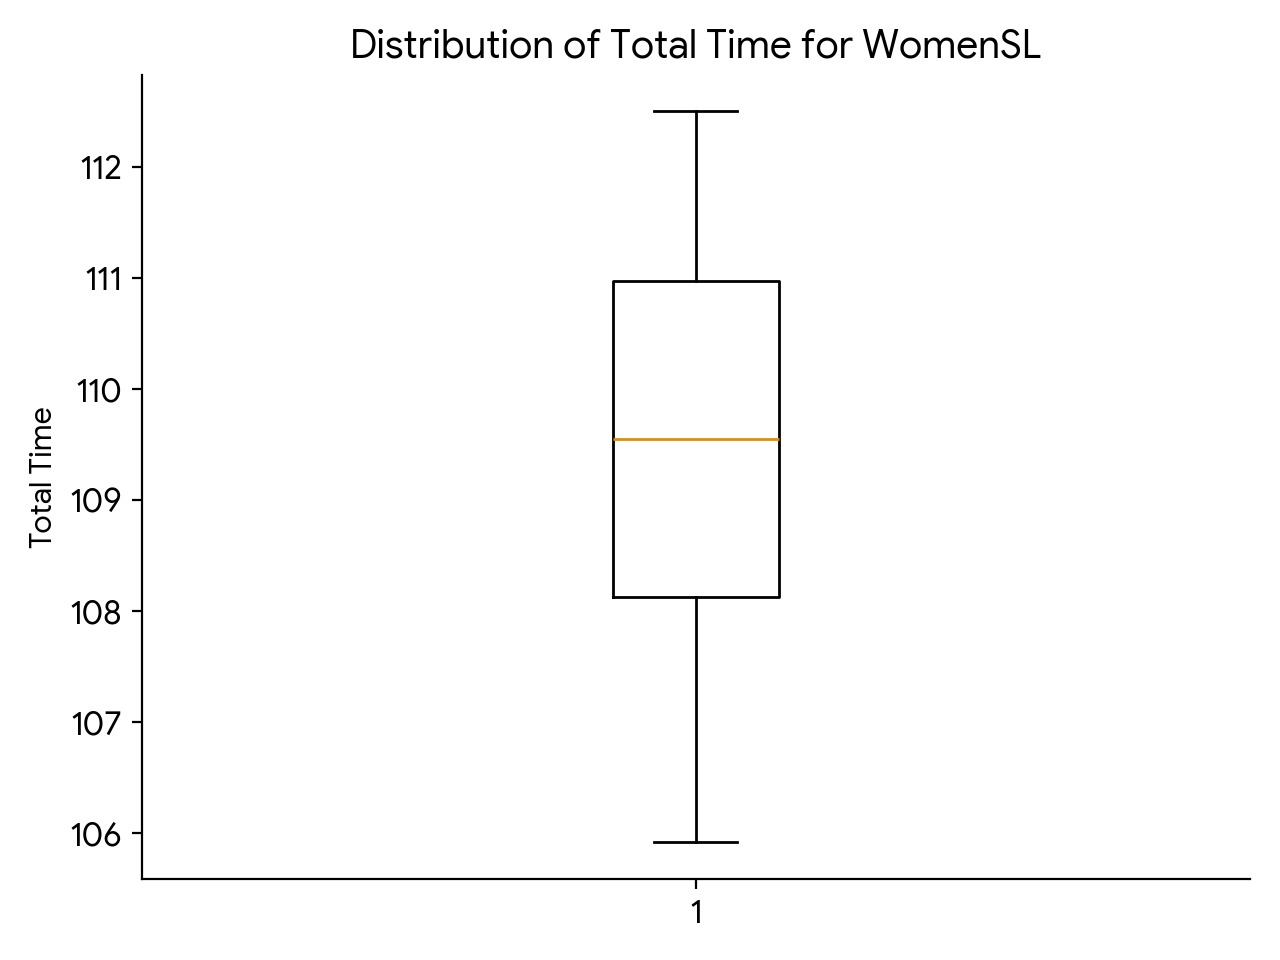

### Text

The boxplot of the total times for the women's slalom race has been generated and displayed. The plot shows the distribution of the total times, with the median around 109.5 seconds. The box represents the interquartile range (IQR), and the whiskers extend to the minimum and maximum values within 1.5 times the IQR. Any points outside the whiskers would be considered outliers.



In [23]:
async with live_client.aio.live.connect(model=model, config=config) as session:



  message = "Generate and run some code to plot the distribution the women's TotalTime as a box chart with matplotlib.pyplot"

  print(f"> {message}\n")
  await session.send(input=message, end_of_turn=True)
  await handle_response(session, tool_impl=execute_query)

In [25]:
async with live_client.aio.live.connect(model=model, config=config) as session:



  message = "Generate and run code to conduct and anlysis of variance between the TotalTimes of mens' and women's results.  Be sure to indentify the statistical test used, include descriptive statistics measuring central tendency, normalcy testing of each distribution and "

  print(f"> {message}\n")
  await session.send(input=message, end_of_turn=True)
  await handle_response(session, tool_impl=execute_query)

> Generate and run code to conduct and anlysis of variance between the TotalTimes of mens' and women's results.  Be sure to indentify the statistical test used, include descriptive statistics measuring central tendency, normalcy testing of each distribution and 



### Text

I need to perform an ANOVA to compare the TotalTimes of men's and women's ski race results. This requires several steps:

1.  **Data Retrieval:** I need to extract the TotalTime data from both the `WomenSL` and `MenSL` tables.
2.  **Descriptive Statistics:** Calculate descriptive statistics (mean, median, standard deviation) for both groups.
3.  **Normality Testing:**  Test if the TotalTime distributions for both men and women are approximately normally distributed. This is an assumption of ANOVA. I can use the Shapiro-Wilk test.
4.  **Homogeneity of Variance Testing:** Test if the variances of TotalTime are equal between the two groups. This is another assumption of ANOVA. I can use Levene's test or Bartlett's test.
5.  **ANOVA:** Perform the ANOVA test.
6.  **Report:** Present the results, including the descriptive statistics, normality test results, homogeneity of variance test results, the ANOVA table, and a conclusion about whether there is a significant difference between the Tot

### Code
```
import pandas as pd
from scipy import stats

# Retrieve data from the database
query_women = "SELECT TotalTime FROM WomenSL"
query_men = "SELECT TotalTime FROM MenSL"

women_results = default_api.execute_query(sql=query_women)
men_results = default_api.execute_query(sql=query_men)

# Convert the results to Pandas DataFrames
women_df = pd.DataFrame(women_results['data'])
men_df = pd.DataFrame(men_results['data'])

# Descriptive statistics
women_mean = women_df['TotalTime'].mean()
women_median = women_df['TotalTime'].median()
women_std = women_df['TotalTime'].std()

men_mean = men_df['TotalTime'].mean()
men_median = men_df['TotalTime'].median()
men_std = men_df['TotalTime'].std()

print("Women's Descriptive Statistics:")
print(f"  Mean: {women_mean}")
print(f"  Median: {women_median}")
print(f"  Standard Deviation: {women_std}")

print("\nMen's Descriptive Statistics:")
print(f"  Mean: {men_mean}")
print(f"  Median: {men_median}")
print(f"  Standard Deviation: {men_std}")

# Normality tests (Shapiro-Wilk)
women_shapiro = stats.shapiro(women_df['TotalTime'])
men_shapiro = stats.shapiro(men_df['TotalTime'])

print("\nWomen's Shapiro-Wilk Test:")
print(f"  Statistic: {women_shapiro.statistic}")
print(f"  p-value: {women_shapiro.pvalue}")

print("\nMen's Shapiro-Wilk Test:")
print(f"  Statistic: {men_shapiro.statistic}")
print(f"  p-value: {men_shapiro.pvalue}")

```

### Tool call

 - DB CALL: execute_query(SELECT TotalTime FROM WomenSL)


### Tool call

 - DB CALL: execute_query(SELECT TotalTime FROM MenSL)


### Result: Outcome.OUTCOME_FAILED
```
('Traceback (most recent call last):\n'
 '  File "<string>", line 55, in <module>\n'
 "KeyError: 'data'\n")
```

### Text

It appears there was an error in accessing the data from the database. The error message `KeyError: 'data'` suggests that the dictionaries returned by `default_api.execute_query` do not have a key named 'data'. I need to inspect the structure of the output from `default_api.execute_query` to correctly extract the data. Let me try printing the keys of one of the returned dictionaries.



### Code
```
query_women = "SELECT TotalTime FROM WomenSL"
women_results = default_api.execute_query(sql=query_women)

print(women_results.keys())

```

### Tool call

 - DB CALL: execute_query(SELECT TotalTime FROM WomenSL)


### Result: Outcome.OUTCOME_OK
```
"dict_keys(['result'])\n"
```

### Text

Okay, the output of `default_api.execute_query` has a key called `result`, not `data`. I need to modify my code to access the data using this key. I also need to be mindful that the data within `result` might be structured in a way that needs further processing. I will revise the code to access `women_results['result']` and `men_results['result']`. I will also print out the first few rows to see the structure of the returned data.



### Code
```
import pandas as pd
from scipy import stats

# Retrieve data from the database
query_women = "SELECT TotalTime FROM WomenSL"
query_men = "SELECT TotalTime FROM MenSL"

women_results = default_api.execute_query(sql=query_women)
men_results = default_api.execute_query(sql=query_men)

# Convert the results to Pandas DataFrames
women_df = pd.DataFrame(women_results['result'])
men_df = pd.DataFrame(men_results['result'])

print("Women's data sample:")
print(women_df.head())

print("\nMen's data sample:")
print(men_df.head())

# Descriptive statistics
women_mean = women_df['TotalTime'].mean()
women_median = women_df['TotalTime'].median()
women_std = women_df['TotalTime'].std()

men_mean = men_df['TotalTime'].mean()
men_median = men_df['TotalTime'].median()
men_std = men_df['TotalTime'].std()

print("\nWomen's Descriptive Statistics:")
print(f"  Mean: {women_mean}")
print(f"  Median: {women_median}")
print(f"  Standard Deviation: {women_std}")

print("\nMen's Descriptive Statistics:")
print(f"  Mean: {men_mean}")
print(f"  Median: {men_median}")
print(f"  Standard Deviation: {men_std}")

# Normality tests (Shapiro-Wilk)
women_shapiro = stats.shapiro(women_df['TotalTime'])
men_shapiro = stats.shapiro(men_df['TotalTime'])

print("\nWomen's Shapiro-Wilk Test:")
print(f"  Statistic: {women_shapiro.statistic}")
print(f"  p-value: {women_shapiro.pvalue}")

print("\nMen's Shapiro-Wilk Test:")
print(f"  Statistic: {men_shapiro.statistic}")
print(f"  p-value: {men_shapiro.pvalue}")

```

### Tool call

 - DB CALL: execute_query(SELECT TotalTime FROM WomenSL)


### Tool call

 - DB CALL: execute_query(SELECT TotalTime FROM MenSL)


### Result: Outcome.OUTCOME_OK
```
("Women's data sample:\n"
 '        0\n'
 '0  105.92\n'
 '1  107.05\n'
 '2  107.30\n'
 '3  107.60\n'
 '4  107.90\n'
 '\n'
 "Men's data sample:\n"
 '         0\n'
 '0  2:00.57\n'
 '1  2:00.60\n'
 '2  2:01.00\n'
 '3  2:01.20\n'
 '4  2:01.50\n')
```

### Result: Outcome.OUTCOME_FAILED
```
('Traceback (most recent call last):\n'
 '  File "<string>", line 65, in <module>\n'
 '  File "frame.py", line 4102, in __getitem__\n'
 '    indexer = self.columns.get_loc(key)\n'
 '              ^^^^^^^^^^^^^^^^^^^^^^^^^\n'
 '  File "range.py", line 417, in get_loc\n'
 '    raise KeyError(key)\n'
 "KeyError: 'TotalTime'\n")
```

### Text

The code is still failing because it's trying to access the column named 'TotalTime', but the column is actually named '0' in the DataFrames. Also, the Men's TotalTime is in `mm:ss.SS` format. I need to convert them to seconds.



### Code
```
import pandas as pd
from scipy import stats
import numpy as np

# Retrieve data from the database
query_women = "SELECT TotalTime FROM WomenSL"
query_men = "SELECT TotalTime FROM MenSL"

women_results = default_api.execute_query(sql=query_women)
men_results = default_api.execute_query(sql=query_men)

# Convert the results to Pandas DataFrames
women_df = pd.DataFrame(women_results['result'])
men_df = pd.DataFrame(men_results['result'])

# Convert Men's time to seconds
def time_to_seconds(time_str):
    if isinstance(time_str, str):
        minutes, seconds = map(float, time_str.split(':'))
        return minutes * 60 + seconds
    else:
        return time_str  # Handle potential numeric values or NaNs

men_df['TotalTime_seconds'] = men_df[0].apply(time_to_seconds)

# Rename women's column for consistency and clarity
women_df = women_df.rename(columns={0: 'TotalTime'})

print("Women's data sample:")
print(women_df.head())

print("\nMen's data sample:")
print(men_df.head())

# Descriptive statistics
women_mean = women_df['TotalTime'].mean()
women_median = women_df['TotalTime'].median()
women_std = women_df['TotalTime'].std()

men_mean = men_df['TotalTime_seconds'].mean()
men_median = men_df['TotalTime_seconds'].median()
men_std = men_df['TotalTime_seconds'].std()

print("\nWomen's Descriptive Statistics:")
print(f"  Mean: {women_mean}")
print(f"  Median: {women_median}")
print(f"  Standard Deviation: {women_std}")

print("\nMen's Descriptive Statistics:")
print(f"  Mean: {men_mean}")
print(f"  Median: {men_median}")
print(f"  Standard Deviation: {men_std}")

# Normality tests (Shapiro-Wilk)
women_shapiro = stats.shapiro(women_df['TotalTime'])
men_shapiro = stats.shapiro(men_df['TotalTime_seconds'])

print("\nWomen's Shapiro-Wilk Test:")
print(f"  Statistic: {women_shapiro.statistic}")
print(f"  p-value: {women_shapiro.pvalue}")

print("\nMen's Shapiro-Wilk Test:")
print(f"  Statistic: {men_shapiro.statistic}")
print(f"  p-value: {men_shapiro.pvalue}")

```

### Tool call

 - DB CALL: execute_query(SELECT TotalTime FROM WomenSL)


### Tool call

 - DB CALL: execute_query(SELECT TotalTime FROM MenSL)


### Result: Outcome.OUTCOME_OK
```
("Women's data sample:\n"
 '   TotalTime\n'
 '0     105.92\n'
 '1     107.05\n'
 '2     107.30\n'
 '3     107.60\n'
 '4     107.90\n'
 '\n'
 "Men's data sample:\n"
 '         0  TotalTime_seconds\n'
 '0  2:00.57             120.57\n'
 '1  2:00.60             120.60\n'
 '2  2:01.00             121.00\n'
 '3  2:01.20             121.20\n'
 '4  2:01.50             121.50\n'
 '\n'
 "Women's Descriptive Statistics:\n"
 '  Mean: 109.51849999999999\n'
 '  Median: 109.55000000000001\n'
 '  Standard Deviation: 1.852623388887399\n'
 '\n'
 "Men's Descriptive Statistics:\n"
 '  Mean: 122.46684210526318\n'
 '  Median: 122.5\n'
 '  Standard Deviation: 1.175065258857184\n'
 '\n'
 "Women's Shapiro-Wilk Test:\n"
 '  Statistic: 0.9769861386959564\n'
 '  p-value: 0.8895565286568422\n'
 '\n'
 "Men's Shapiro-Wilk Test:\n"
 '  Statistic: 0.960657618519764\n'
 '  p-value: 0.5854042674875388\n')
```

# Results
<div class="alert alert-block alert-danger">
<b>BLUF:</b> Failure. <br> 
    The system failed to understand the ask and selected the wrong test.  ANOVA will only tell us if the two sets of data are from the same population which they are.  <br>  
</div>

# Discusion
# Discussion and Next Steps
 -   Chosing the Correct Test
      -  Grounding - may provide additional context for understanding that men and women results are distinct sets known to be different populations
      -  Prompt Engineering - COT prompting may lead the agent to the correct the method as it will have to consider which test
 - Interesting Results
     - The system self corrected the building of the data frame from SQL table to include lables
     - Correctly provided summary statistics

I think with some fine tuning and grounding this will become a viable solution

### Author  
**Shannon O'Donovan**  
Data Science | AI & Salesforce Architect  
📧 [shannon.od3.dev@gmail.com] (mailto:shannon.od3.dev@gmail.com)  
🌐 [linkedin.com/in/shannonodonovan](https://linkedin.com/in/shannonodonovan)  
